# Y = b0 + b1x1 + b2(x1)**2 + b3(x1)**3 + .....

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

In [7]:
dataset = pd.read_csv(r"D:\ML\WsCubeTech\data\salary\salary.csv")
dataset.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [8]:
dataset = dataset[["Years of Experience","Salary"]]

In [9]:
dataset

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


In [25]:
dataset.select_dtypes(include="float64").columns #Handling missing value

Index(['Years of Experience', 'Salary'], dtype='object')

In [26]:
si = SimpleImputer(strategy="mean")
ar = si.fit_transform(dataset[['Years of Experience', 'Salary']])

In [27]:
dataset = pd.DataFrame(ar,columns=dataset.select_dtypes(include="float64").columns)

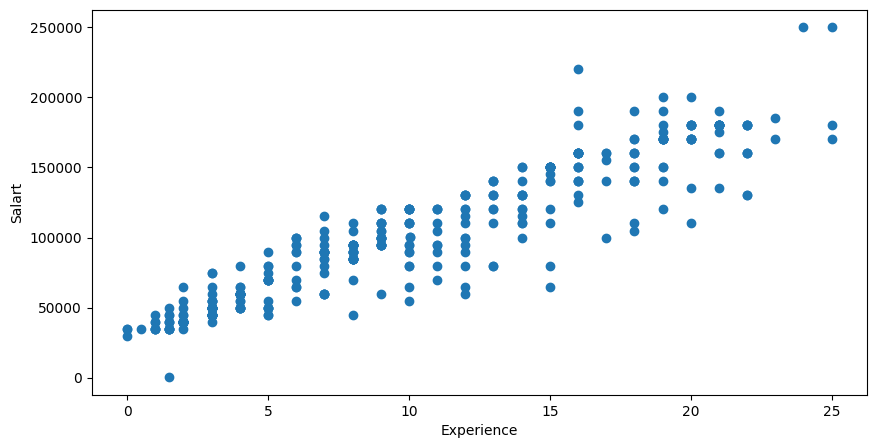

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(dataset["Years of Experience"],dataset["Salary"])
plt.xlabel("Experience")
plt.ylabel("Salart")
plt.show()

In [29]:
dataset.corr()

,Years of Experience,Salary
Years of Experience,1.000000,0.930338
Salary,0.930338,1.000000


In [30]:
x = dataset[["Years of Experience"]]
y = dataset["Salary"]

In [31]:
pf = PolynomialFeatures(degree=2)

In [33]:
pf.fit(x)
x = pf.transform(x)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32,test_size=0.2)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
lr.score(x_test,y_test)*100

91.60689327892798

In [69]:
prd = lr.predict(x)

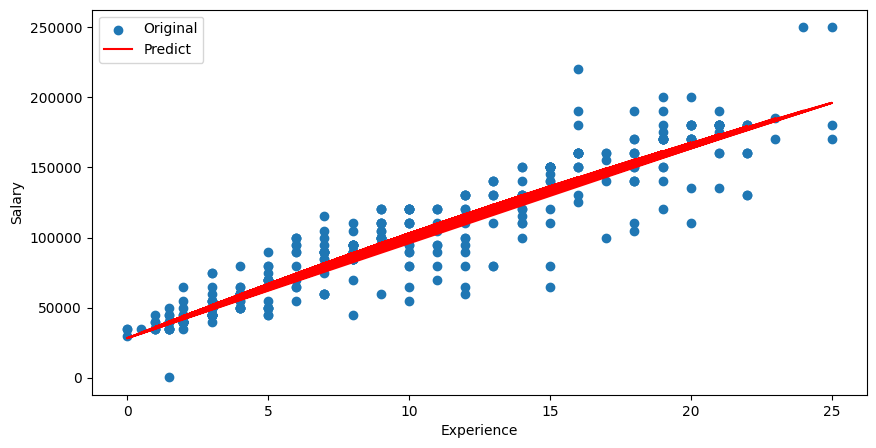

In [75]:
plt.figure(figsize=(10,5))
plt.scatter(dataset["Years of Experience"],dataset["Salary"])
plt.plot(dataset["Years of Experience"],prd, c="red")

plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend(["Original","Predict"])
plt.show()